In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import numpy.linalg as npla
import scipy.linalg as spla

In [2]:
#Initialization
player_cards = 10
dealer_faceupcard = 10

cards = 10
distribution_cards = np.zeros(10)
for i in range(0,cards-1):
    distribution_cards[i] = 1/13.0
distribution_cards[cards-1] = 4/13.0 


In [3]:
def moving(pcs, dfc, pa, da, t):
    player_cardsum = pcs
    dealer_cardsum = dfc
    player_ace = pa
    dealer_ace = da
    reward = 0
    turn = t

    if turn==1:
        tempcard = np.random.choice(cards, p=distribution_cards)
        tempcard = tempcard + 1
        dealer_cardsum = dealer_cardsum + tempcard
        #bust criteria
        if dealer_cardsum > 20:
            if dealer_ace==True:
                dealer_cardsum = dealer_cardsum - 10
                dealer_ace = False
            else:
                dealer_cardsum = 21
        #stick criteria
        if dealer_cardsum > 16:
            if dealer_cardsum+1 == player_cardsum+12:
                reward = 0
            elif dealer_cardsum > 20:
                reward = 1
            else:
                temp = player_cardsum+11 -dealer_cardsum
                if(temp>0):
                    reward = 1
                elif temp==0:
                    reward = 0
                else:
                    reward = -1
    else:
        tempcard = np.random.choice(cards, p=distribution_cards)
        tempcard = tempcard + 1
        player_cardsum = player_cardsum+tempcard
        #bust criteria
        if player_cardsum > 9:
            #if player has ace, then can count ace as 1 instead of 11
            if player_ace==0:
                player_cardsum = player_cardsum - 10
                #mark ace as 1
                player_ace = 1
            else:
                player_cardsum = 10
                reward = -1
    return player_cardsum, dealer_cardsum, player_ace, dealer_ace, reward

In [4]:
def MCepisode(player_cardsum, dealer_sum, player_ace):
    episode = []
    flag = True
    dealer_ace = 0
    if dealer_sum==0:
        dealer_ace = 1
    else:
        dealer_ace = 0
    dealer_cardsum = 10+dealer_sum
    
    while flag==True:
        tempepisode = [[player_cardsum, dealer_sum, dealer_cardsum, player_ace]]
        if player_cardsum < 8:
            turn = 0
            tempepisode.append(turn)
            player_cardsum, dealer_cardsum, player_ace, dealer_ace, reward = moving(player_cardsum, dealer_cardsum, player_ace, dealer_ace, turn)
            tempepisode.append(reward)
            episode.append(tempepisode)
        #stick criteria
        else:
            if player_cardsum>9:
                flag = False
            if dealer_cardsum<16:
                turn = 1
                tempepisode.append(turn)
                player_cardsum, dealer_cardsum, player_ace, dealer_ace, reward = moving(player_cardsum, dealer_cardsum, player_ace, dealer_ace, turn)
                tempepisode.append(reward)
                episode.append(tempepisode)
            else:
                flag = False
    return episode
            

In [5]:
StateValFun_V = np.zeros((11,11,2))
count = np.zeros((10,10,2))

iterations = 500000
stop1 = 9999
stop1V = 0

for iternum in range(0,iterations):
    player_cardsum = np.random.randint(10)
    dealer_sum = np.random.randint(10)
    player_ace = np.random.randint(2)
    episode = MCepisode(player_cardsum, dealer_sum, player_ace)
    T = len(episode)
    G = 0
    for t in range(T-1,-1,-1):
        (player_cardsum, dealer_sum, dealer_cardsum, player_ace), turn, reward = episode[t]
        if player_cardsum<=9:
            G = G + reward
            StateValFun_V[player_cardsum, dealer_sum, player_ace] += (G - StateValFun_V[player_cardsum, dealer_sum, player_ace])/(count[player_cardsum, dealer_sum, player_ace]+1)
            count[player_cardsum, dealer_sum, player_ace] += 1
    if iternum == stop1:
        stop1V = np.copy(StateValFun_V)


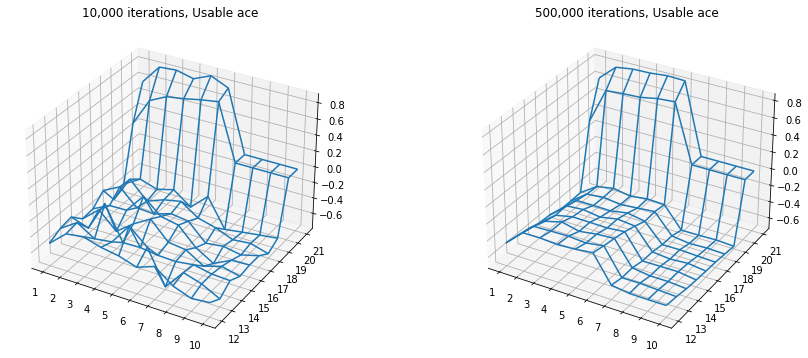

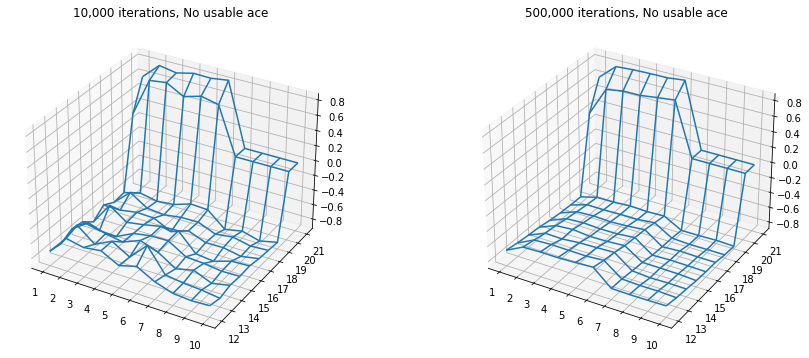

In [6]:
x, y = np.meshgrid(np.arange(10)+12,np.arange(10)+1,indexing='ij')
figure1 = plt.figure(figsize=(15,6))
sub1 = figure1.add_subplot(121, projection='3d')
sub1.plot_wireframe(y,x,stop1V[:-1, :-1, 0])
plt.xticks(np.arange(10)+1)
plt.yticks(np.arange(10)+12)
sub1.title.set_text('10,000 iterations, Usable ace')
sub2 = figure1.add_subplot(122, projection='3d')
sub2.plot_wireframe(y,x,StateValFun_V[:-1, :-1, 0])
plt.xticks(np.arange(10)+1)
plt.yticks(np.arange(10)+12)
sub2.title.set_text('500,000 iterations, Usable ace')
figure2 = plt.figure(figsize=(15, 6))
sub1 = figure2.add_subplot(121, projection='3d')
sub1.plot_wireframe(y,x,stop1V[:-1, :-1, 1])
plt.xticks(np.arange(10)+1)
plt.yticks(np.arange(10)+12)
sub1.title.set_text('10,000 iterations, No usable ace')
sub2 = figure2.add_subplot(122, projection='3d')
sub2.plot_wireframe(y,x,StateValFun_V[:-1, :-1, 1])
plt.xticks(np.arange(10)+1)
plt.yticks(np.arange(10)+12)
sub2.title.set_text('500,000 iterations, No usable ace')
